In [4]:
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import random as ran
import pandas as pd
from sklearn.model_selection import train_test_split

# Load data :

### MNIST

In [2]:
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


### JAFFE

In [10]:
jaffe_X = pd.read_csv("jaffeX.csv",delimiter=";")
jaffe_y = pd.read_csv("jaffeY.csv",delimiter=";")

In [11]:
jaffe_y = pd.get_dummies(jaffe_y.values.reshape([jaffe_y.shape[1]])).values +0.
jaffe_X = jaffe_X.values/255

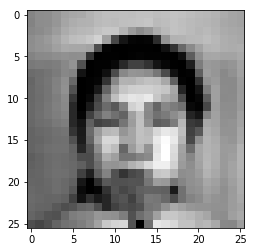

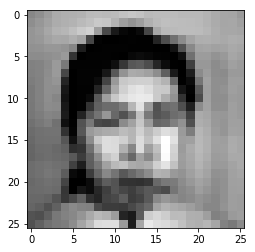

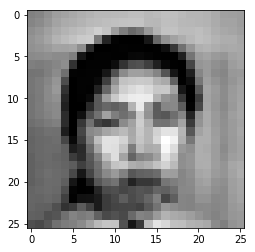

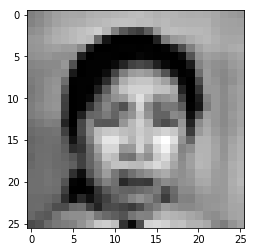

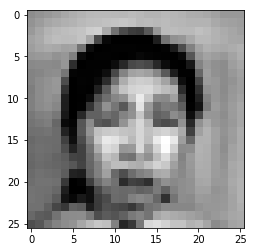

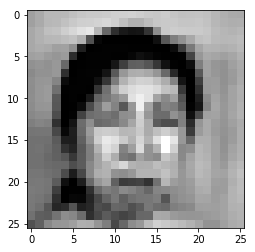

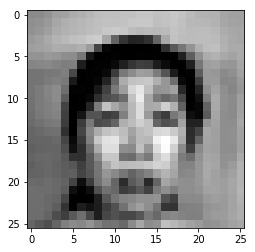

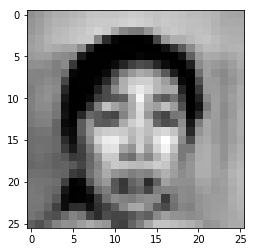

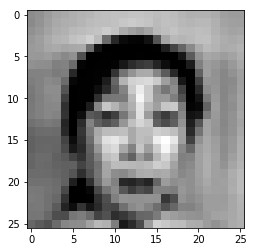

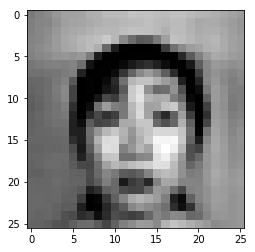

In [5]:
# Affichage d'un exemple d'image

for i in range(10):

    img = jaffe_X[i].reshape([26,26])
    plt.imshow(img.transpose(),cmap="gray")
    plt.show()

In [15]:
# RANDOM SPLIT JAFFE DATASET

X_train, X_test, y_train, y_test = train_test_split( jaffe_X, jaffe_y, test_size=0.25, random_state=42)

print("Number of samples in training set : ",X_train.shape[0])
print("Number of samples in test set : ",X_test.shape[0])

Number of samples in training set :  159
Number of samples in test set :  54


# Neural network with Random initialisation

In [206]:
# CREATION DU RESEAU DE NEURONE
sess.close()
sess = tf.Session()

x = tf.placeholder(tf.float32, shape=[None, 676])

# XAVIER INITIALIZER
initializer =  tf.contrib.layers.xavier_initializer()

# NORMAL DISTRIBUTION
#initializer = tf.random_normal_initializer()

# ZEROS INITIALIZER
#initializer = tf.zeros


W1 = tf.Variable(initializer([676,100]))
b1 = tf.Variable(initializer([100]))

y1 = tf.nn.sigmoid(tf.add(tf.matmul(x,W1),b1))

W2 = tf.Variable(initializer([100,50]))
b2 = tf.Variable(initializer([50]))

y2 = tf.nn.sigmoid(tf.add(tf.matmul(y1,W2),b2))

W3 = tf.Variable(initializer([50,10]))
b3 = tf.Variable(initializer([10]))

y = tf.nn.softmax(tf.add(tf.matmul(y2,W3),b3))

y_ = tf.placeholder(tf.float32, shape=[None, 10])

cross_entropy = -tf.reduce_mean(tf.reduce_sum(y_ * tf.log(y) + (1 - y_) * tf.log(1 - y), axis=1))



LEARNING_RATE = 0.1

training = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(cross_entropy)

correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

sess.run(tf.global_variables_initializer())

epoch :  0 / 1000
accuracy :  0.12962963
loss :  3.736294

epoch :  10 / 1000
accuracy :  0.074074075
loss :  3.2538042

epoch :  20 / 1000
accuracy :  0.074074075
loss :  3.2356498

epoch :  30 / 1000
accuracy :  0.074074075
loss :  3.2286615

epoch :  40 / 1000
accuracy :  0.074074075
loss :  3.2216191

epoch :  50 / 1000
accuracy :  0.11111111
loss :  3.2143526

epoch :  60 / 1000
accuracy :  0.12962963
loss :  3.2067828

epoch :  70 / 1000
accuracy :  0.12962963
loss :  3.1988287

epoch :  80 / 1000
accuracy :  0.12962963
loss :  3.1904032

epoch :  90 / 1000
accuracy :  0.14814815
loss :  3.181412

epoch :  100 / 1000
accuracy :  0.2037037
loss :  3.171751

epoch :  110 / 1000
accuracy :  0.24074075
loss :  3.1613054

epoch :  120 / 1000
accuracy :  0.25925925
loss :  3.1499422

epoch :  130 / 1000
accuracy :  0.2962963
loss :  3.13751

epoch :  140 / 1000
accuracy :  0.2962963
loss :  3.123834

epoch :  150 / 1000
accuracy :  0.2962963
loss :  3.1087081

epoch :  160 / 1000
accur

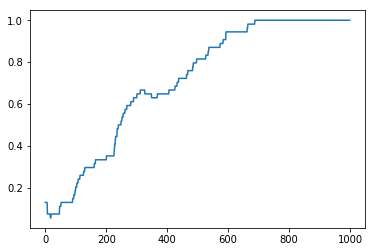

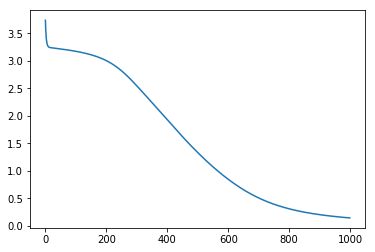

In [207]:
# TRAINING : 

acs = []
ls = []

number_of_epoch = 1000

for i in range(number_of_epoch):
    ac = sess.run(accuracy,feed_dict={x : X_test, y_ : y_test})
    l = sess.run(cross_entropy,feed_dict={x : X_train, y_ : y_train})
    sess.run(training,feed_dict={x : X_train, y_ : y_train})
    acs.append(ac)
    ls.append(l)
    if(i%10 == 0):
        print("epoch : ", i, "/", number_of_epoch)
        print("accuracy : " , ac)
        print("loss : ",l )
        print()
        
plt.plot(acs)
plt.show()

plt.plot(ls)
plt.show()

In [161]:
sess.close()

# AUTO ENCODER

In [83]:
sess = tf.Session()

learning_rate = 0.01

initializer = tf.contrib.layers.xavier_initializer()


X = tf.placeholder(tf.float32, shape=[None, 676])

# encoder layers : 

w1 = tf.Variable(initializer([676, 100]))
b1 = tf.Variable(initializer([100]))

layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(X, w1),b1))

w2 = tf.Variable(initializer([100, 50]))
b2 = tf.Variable(initializer([50]))

layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, w2),b2))

# decoder layers : 

w3 = tf.Variable(initializer([50, 100]))
b3 = tf.Variable(initializer([100]))

layer_3 = tf.nn.sigmoid(tf.add(tf.matmul(layer_2, w3),b3))

w4 = tf.Variable(initializer([100, 676]))
b4 = tf.Variable(initializer([676]))

y_pred = tf.nn.sigmoid(tf.add(tf.matmul(layer_3, w4),b4))

y_true = X

loss = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(loss)

init = tf.global_variables_initializer()
sess.run(init)

loss :  0.019049602
loss :  0.019286737
loss :  0.019921506
loss :  0.019786779
loss :  0.0194541
loss :  0.018912537
loss :  0.018438729
loss :  0.017584478
loss :  0.016624236
loss :  0.015531198
loss :  0.013095436
loss :  0.014692565
loss :  0.011803268
loss :  0.011605318
loss :  0.01228885
loss :  0.011690045
loss :  0.011102
loss :  0.011587075
loss :  0.012079249
loss :  0.010924677
loss :  0.009830473
loss :  0.011483139
loss :  0.009253756
loss :  0.009349083
loss :  0.0083354805
loss :  0.007793635
loss :  0.013798979
loss :  0.007894839
loss :  0.007783805
loss :  0.008679189
loss :  0.006651954
loss :  0.007864915
loss :  0.007115486
loss :  0.006274992
loss :  0.0063002696
loss :  0.006513394
loss :  0.0062223827
loss :  0.0065450296
loss :  0.0059238905
loss :  0.0061222473
loss :  0.0053158696
loss :  0.0056270617
loss :  0.005567665
loss :  0.0052176057
loss :  0.0048346617
loss :  0.004856506
loss :  0.0064213113
loss :  0.0051367073
loss :  0.004321515
loss :  0.0043

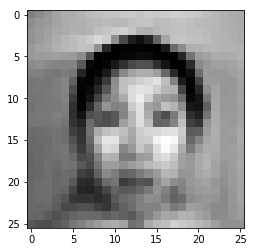

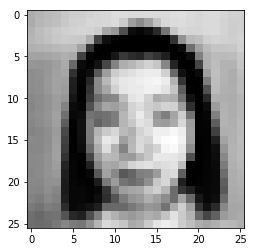

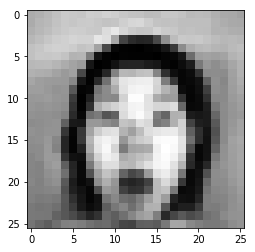

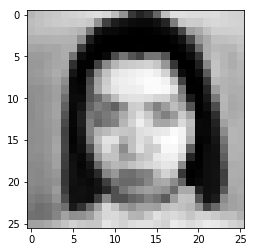

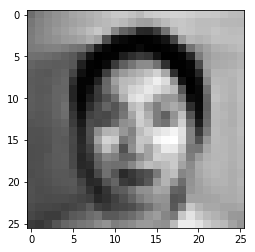

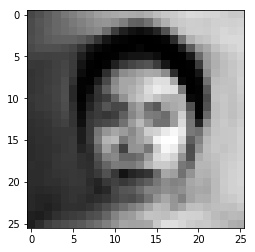

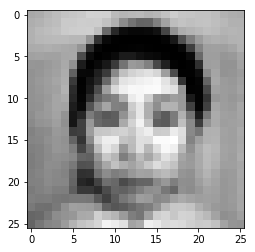

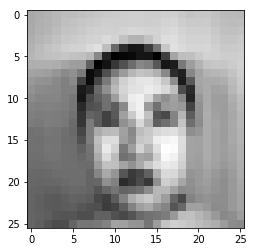

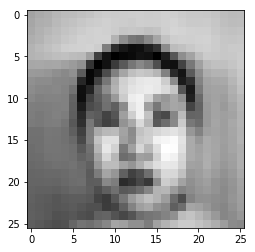

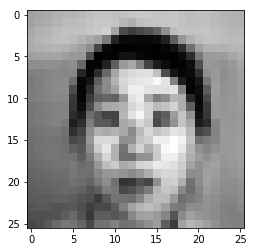

In [87]:
for i in range(1000):

    sess.run(optimizer,feed_dict={X : X_train})
    l = sess.run(loss,feed_dict={X : X_train} )
    if i % 10 == 0 : 
        print("loss : ", l)

img_reconstructed = sess.run(y_pred, feed_dict={X : X_test})

# SHOW 10 reconstructed images :

for i in range(10):
    image = img_reconstructed[i].reshape([26,26])
    plt.imshow(image.transpose(),cmap = "gray")
    plt.show()

## Training with autoencoder initialisation